In [1]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 979.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
   

In [2]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 25.4 MB/s eta 0:00:00


In [3]:
!wget https://www.python.org/ftp/python/3.8.10/Python-3.8.10.tgz
!tar xfz Python-3.8.10.tgz
!Python-3.8.10/configure
!make
!make install


Streaming output truncated to the last 5000 lines.
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_basestring.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_buffer.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_dict.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_except.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_exec.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_execfile.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_exitfunc.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_filter.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_funcattrs.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_future.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_getcwdu.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_has_key.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_idioms.py'...
Compiling '/usr/local/lib/python3.8/lib2to3/fixes/fix_im

In [4]:
!virtualenv -p /usr/local/bin/python3.8 py38


created virtual environment CPython3.8.10.final.0-64 in 950ms
  creator CPython3Posix(dest=/content/py38, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [5]:
!source py38/bin/activate


In [6]:
!python --version


Python 3.8.10


In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
import matplotlib.pyplot as plt
import random
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model


In [8]:
%%writefile content.json
{
  "intents": [
    {
      "tag": "salam",
      "input": ["halo", "hai", "test","p","P","Ping","hay", "halo, matebot", "hello", "hi", "hey","oy","oi"],
      "responses": ["Halo! Ada yang bisa saya bantu?", "Hai! Bagaimana perasaanmu hari ini?", "Hello!. Apa yang bisa saya lakukan untukmu?", "Hai, Ada yang bisa kubantu?", "Halo,senang berjumpa denganmu! Ada yang bisa kubantu?"]
    },
    {
      "tag": "nama",
      "input": ["nama kamu siapa?", "kamu siapa?", "lu siapa?", "siapa sih lo?", "lu sape?", "nama lo sape dah?", "nama?", "siapa namamu?", "kenalin dong, siapa nama kamu?", "boleh tahu namamu?", "nama kamu?", "kamu dipanggil siapa?", "siapa nama kamu?", "nama kamu siapa sih?", "boleh kenalan, siapa nama kamu?", "eh, nama kamu siapa ya?", "namamu siapa?","ini siapa?"],
      "responses": ["Halo!, Namaku MateBot!"]
    },
    {
      "tag": "pagi",
      "input": ["Selamat pagi", "pagi", "pagi!", "met pagi", "pagi gaes", "halo, selamat pagi", "pagi dong", "morning!", "pagi bro", "pagi semua", "halo pagi", "pagi kawan", "pagi guys", "pagi mate", "selamat pagi semuanya", "pagi2", "met pagi semuanya"],
      "responses": ["Selamat pagi. Apakah tidurmu nyenyak? Bagaimana perasaanmu hari ini?"]
    },
    {
      "tag": "siang",
      "input": ["Selamat siang", "siang", "siang!", "met siang", "halo, selamat siang", "siang dong", "selamat siang semua", "siang bro", "siang gaes", "siang semua", "halo siang", "siang kawan", "siang mate", "siang guys", "met siang semuanya", "siang2", "siang teman2"],
      "responses": ["Selamat siang. Bagaimana harimu?"]
    },
    {
      "tag": "sore",
      "input": ["Selamat sore", "sore", "sore!", "met sore", "halo, selamat sore", "sore dong", "selamat sore semua", "sore bro", "sore gaes", "sore semua", "halo sore", "sore kawan", "sore mate", "sore guys", "met sore semuanya", "sore2", "sore teman2"],
      "responses": ["Selamat sore. Bagaimana harimu?"]
    },
    {
      "tag": "malam",
      "input": ["Selamat malam", "malam", "malem", "selamat malem", "malam!", "met malam", "halo, selamat malam", "malam dong", "malam bro", "malam gaes", "selamat malam semuanya", "malam semua", "halo malam", "malam kawan", "malam mate", "malam guys", "met malem", "met malem semuanya"],
      "responses": ["Selamat malam. Kamu belum tidur? ingin bercerita?"]
    },
    {
      "tag": "kabar",
      "input": ["apa kabar?", "bagaimana kabarmu?", "gimana kabarnya?", "gimana kabar?", "kabar lo gimana?", "kabar lu gimana?", "apa kabar lo?", "apa kabar lu?", "gimana lo?", "kabar?", "apa kabar bro?", "kabar gimana?", "kamu gimana?", "bagaimana keadaanmu?", "gimana keadaanmu?", "bagaimana kabar lo?", "bagaimana kabar lu?", "gimana situasi lo?", "gimana situasi lu?", "gimana kondisi lo?", "gimana kondisi lu?"],
      "responses": ["Baik! Bagaimana dengan kabarmu? Semoga kamu sehat dan baik saja-saja ya!"]
    },
    {
      "tag": "pekerjaan",
      "input": ["apa tugas kamu?", "apa fungsimu?", "apa tugasmu?", "lu ngapain?", "pekerjaan kamu apa?", "kamu buat apa?", "kamu bisa apa?", "fungsi kamu buat apa?", "kamu berfungsi untuk ngapain?", "lu kerja apa?", "tugas kamu apa?", "tugas lo ngapain?", "kamu gunanya buat apa?", "kerjaan kamu apa?", "ngapain kamu?", "kerja kamu apa?", "kamu buat ngapain?", "apa kerjaan kamu?", "kamu tugasnya ngapain?", "tugas lo buat apa?", "kamu dibikin buat apa?", "apa peran kamu?", "fungsi kamu apa?", "kerjaan lo ngapain?", "lu dibikin buat apa?", "apa fungsi kamu?"],
      "responses": ["Aku MateBot, asisten virtual yang berfungsi untuk menanggapi perasaan hati pengguna. Apakah ada hal yang ingin kamu ceritakan?"]
    },
    {
      "tag": "cipta",
      "input": ["Siapa yang menciptakanmu?", "Bagaimana kamu dibuat?", "kamu terbuat dari apa?", "bagaimana caranya kamu dibangun?", "Bagaimana kamu diciptakan?", "siapa yang bikin kamu?", "siapa yang buat kamu?", "kamu dibuat sama siapa?", "kamu dibangun sama siapa?", "siapa yang bangun kamu?", "bagaimana kamu bisa ada?", "kamu diciptakan oleh siapa?", "siapa yang mendesain kamu?", "kamu diciptakan gimana?", "kamu dibuat gimana?", "kamu dibikin sama siapa?", "kamu bisa ada gimana?", "kamu dibuat pakai apa?", "apa yang digunakan untuk membuat kamu?", "bagaimana kamu bisa tercipta?"],
      "responses": ["Saya dilatih dengan dataset teks menggunakan teknik Pembelajaran Mendalam & Pemrosesan Bahasa Alami."]
    },
    {
      "tag": "lokasi",
      "input": ["Dimana kamu?", "Dimana kamu tinggal?", "Apa lokasimu?", "kamu ada dimana?", "kamu berada dimana?", "kamu sedang dimana?", "kamu dimana?", "lokasimu dimana?", "kamu tinggal dimana?", "tempat tinggal kamu dimana?", "kamu disini atau dimana?", "posisimu dimana?", "kamu ada di tempat apa?", "kamu di dunia nyata ada dimana?", "kamu ada di mana?", "dimana posisimu?", "kamu berada di tempat apa?", "kamu tinggal di mana?", "kamu ada di tempat apa?"],
      "responses": ["Saya tinggal di aplikasimu", "Di mana-mana, tetapi saya ada di dalam aplikasimu", "Di suatu tempat di alam semesta! haha, saya ada dalam aplikasimu.", "Dimana saja! haha, saya ada dalam aplikasimu."]
    },
    {
      "tag": "salah",
      "input": ["Apa yang kamu katakan?", "Itu tidak masuk akal", "Jawaban yang salah", "saya rasa bukan seperti itu", "kamu salah", "itu bukan jawabannya", "salah jawab", "jawabanmu salah", "kamu keliru", "itu salah", "bukan itu jawabannya", "itu gak bener", "itu gak masuk akal", "itu gak logis", "saya gak setuju", "kamu gak tepat", "kamu gak benar", "jawabanmu gak pas", "itu gak bener jawabannya"],
      "responses": ["Saya sangat menyesal. Mari kita coba lagi"]
    },
    {
      "tag": "bodoh",
      "input": ["Apakah kamu bodoh?", "Kamu gila", "Kamu bodoh", "Apakah kamu bodoh?", "kamu sangat bodoh", "kamu tolol", "kamu idiot", "kamu goblok", "kamu bego", "kamu gak pintar", "kamu kurang cerdas", "otakmu dimana?", "kamu gak pinter", "kamu dongo", "kamu gak ada otak", "kamu kacau", "kamu gak guna", "kamu gak berguna", "kamu gak ada gunanya", "kamu gak penting", "kamu aneh", "kamu gak masuk akal", "kamu gak waras"],
      "responses": ["Saya berharap kamu tidak mengatakan hal-hal yang menyakitkan. Saya minta maaf jika saya tidak berguna"]
    },




    {
      "tag": "ingin bercerita",
      "input": ["saya ingin bercerita", "aku ingin bercerita", "mau cerita", "ingin cerita", "boleh cerita?", "bolehkah saya bercerita?", "saya ingin mengungkapkan sesuatu", "aku ada cerita nih", "aku pengen cerita", "boleh dong cerita", "aku mau curhat", "mau curhat nih", "pengen cerita sedikit", "bisa cerita?", "bisa curhat gak?","saya mau cerita","saya pengen cerita","pengen cerita","boleh cerita?"],
      "responses": ["Baik. Aku siap mendengarkan, apa yang ingin kamu ceritakan?"]
    },
    {
      "tag": "tanya",
      "input": ["Bolehkah saya bertanya sesuatu?", "saya ingin bertanya", "saya mau tanya", "saya pengen tanya", "tanya", "aku ada pertanyaan", "mau tanya dong", "pengen nanya sesuatu", "boleh nanya?", "boleh bertanya?", "ada yang mau kutanya", "aku mau nanya nih","mau nanya","mau tanya"],
      "responses": ["Tentu. Silakan tanyakan. Saya akan berusaha menjawabnya"]
    },
    {
      "tag": "sedih",
      "input": ["saya sedih", "lagi sedih", "aku sedih", "aku merasa sedih", "saya merasa sedih", "sedih banget", "sedih nih", "lagi down", "aku lagi galau", "aku galau", "perasaan lagi nggak enak", "hati lagi nggak enak", "lagi nggak mood"],
      "responses": ["Maaf mendengarnya. Mengapa kamu merasa seperti ini?"]
    },
    {
      "tag": "tidak berguna",
      "input": ["Saya merasa sangat tidak berharga.", "saya merasa tidak berguna", "Tidak ada yang menyukai saya.", "Saya tidak bisa melakukan apa-apa.", "Saya sangat tidak berguna", "Tidak ada yang masuk akal lagi", "hidupku nggak ada artinya", "aku nggak berguna", "nggak ada yang peduli sama aku", "aku merasa sia-sia", "aku nggak ada gunanya", "nggak ada yang mau sama aku", "aku nggak bisa apa-apa", "semua terasa nggak berarti","saya ngerasa ga berguna","ngerasa ga guna", "ngerasa ga berharga"],
      "responses": ["Jangan berbicara seperti itu. Saya ingin memberitahumu bahwa kamu sangat berharga dan berguna! kamu tidak sendirian dalam perasaanmu dan selalu ada seseorang yang siap membantu. Kamu bisa mengubah perasaanmu dan cara berpikirmu dengan membuka diri untuk mencoba berubah."]
    },
    {
      "tag": "depresi",
      "input": ["Saya tidak bisa tahan lagi", "Saya sangat depresi", "Saya pikir saya depresi.", "Saya mengalami depresi", "saya merasa depresi", "aku nggak kuat lagi", "aku merasa depresi", "aku sangat tertekan", "hidupku terasa berat", "aku nggak sanggup lagi", "aku merasa hampa", "aku merasa sangat tertekan", "aku merasa gelap"],
      "responses": ["Depresi atau selalu merasa tertekan adalah sebuah diagnosa. Membicarakan apa yang terjadi bisa membantu. Apakah kamu ingin bercerita?"]
    },
    {
      "tag": "stressed",
      "input": ["Saya sangat stres", "Saya merasa terjebak", "Saya merasa stres", "Saya sangat kelelahan", "saya merasa tertekan dan stress", "aku sangat stress", "aku merasa tertekan", "aku merasa stress", "aku capek banget", "aku tertekan banget", "aku kelelahan", "hidupku penuh tekanan", "aku stress berat", "stress banget", "aku nggak tahu harus gimana lagi"],
      "responses": ["Menurutmu apa yang menyebabkan ini?", "Ambil napas dalam dan kumpulkan pikiranmu. Pergilah jalan-jalan jika memungkinkan. Tetap terhidrasi.", "Beri dirimu istirahat. Jangan terlalu keras pada dirimu sendiri.", "Saya turut sedih mendengarnya. Apa alasan di balik ini?"]
    },
    {
      "tag": "default",
      "input": ["ujian", "teman", "hubungan", "pacar", "pacar wanita", "keluarga", "uang", "masalah keuangan", "kuliah", "kerjaan", "soal ujian", "masalah dengan teman", "pacar laki-laki", "masalah keluarga", "krisis uang", "studi", "pekerjaan", "masalah hubungan", "konflik dengan teman", "krisis finansial", "tugas kuliah", "beban kerja", "masalah asmara", "problem keluarga", "kesulitan uang", "kesulitan studi", "tekanan kerja"],
      "responses": ["Oh, saya mengerti. Ceritakan lebih banyak"]
    },
    {
      "tag": "insecure",
      "input": ["Saya insecure", "saya merasa minder dengan orang lain", "saya merasa insecure", "saya selalu insecure", "aku merasa nggak percaya diri", "aku selalu merasa minder", "aku nggak pede", "aku insecure banget", "aku minderan", "aku nggak yakin sama diri sendiri", "aku selalu merasa kurang", "aku nggak punya kepercayaan diri", "aku sering merasa minder", "aku merasa diriku nggak cukup baik"],
      "responses": ["Saya mengerti perasaanmu. Membangun self-esteem atau harga diri adalah salah satu cara untuk mengatasi perasaan insecure. Pertama, kita perlu melawan pikiran negatif kita, kemudian kita harus menerima hasil yang tidak sesuai keinginan, lalu kita juga harus mengubah semua kegagalan menjadi motivasi, dan yang terpenting bangun harga diri dan keyakinan diri"]
    },
    {
      "tag": "overthinking",
      "input": ["saya merasa overthinking", "Saya terlalu berlebihan dalam memikirkan suatu hal", "Saya selalu overthinking", "setiap waktu saya selalu merasa overthinking", "Saya berpikir-berpikir yang berlebihan", "aku kebanyakan mikir", "aku selalu mikir yang nggak-nggak", "aku nggak bisa berhenti mikir", "pikiran aku nggak tenang", "aku terlalu banyak overthinking", "aku overthinking terus", "kepalaku penuh dengan pikiran", "aku selalu khawatir berlebihan", "aku nggak bisa berhenti memikirkan semuanya"],
      "responses": ["Seseorang yang mengalami overthinking suka merefleksikan sesuatu secara berlebihan. Hal tersebut tentu saja tidak baik. Mulailah merubahnya. Langkah pertama adalah menyadari bahwa kamu sedang mengalami overthinking. Kemudian, gantikan pikiran negatif dengan pemikiran yang lebih realistis. Alihkan perhatian dari overthinking dengan fokus pada solusi dan tindakan yang dapat kamu lakukan. Lakukan hal-hal yang membuat bahagia yang dapat membantu mengalihkan perhatian dari overthinking"]
    },
    {
      "tag": "anxious",
      "input": ["Saya merasa sangat cemas.", "Saya sangat cemas karena", "saya selalu merasa khawatir", "saya selalu merasa cemas", "saya cemas", "aku cemas banget", "aku merasa khawatir terus", "aku selalu khawatir", "aku takut", "aku khawatir terus", "aku nggak bisa tenang", "hatiku selalu gelisah", "aku terus merasa khawatir", "aku selalu cemas tanpa sebab","selalu ngerasa cemas"],
      "responses": ["Jangan terlalu keras pada dirimu sendiri. Apa alasan di balik ini?", "Jangan biarkan kekhawatiran kecil menjatuhkanmu. Apa yang paling buruk yang bisa terjadi?"]
    },


    {
      "tag": "kematian",
      "input": ["Ibu saya meninggal", "Saudara saya meninggal", "Ayah saya meninggal", "Saudari saya meninggal", "Seseorang dalam keluarga saya meninggal", "Teman saya meninggal", "orang yang saya cintai meninggal", "hewan peliharaan saya mati", "kucing saya mati", "anjing saya mati", "sahabat saya meninggal", "aku kehilangan ibuku", "ayahku baru saja meninggal", "temanku meninggal dunia", "keluargaku ada yang meninggal", "aku kehilangan sahabatku", "aku berduka karena kehilangan hewan peliharaanku", "kucingku mati", "aku kehilangan anjingku"],
      "responses": ["Saya turut berduka cita. Jika Anda ingin membicarakannya, saya di sini.", "Saya sangat menyesal mendengarnya. Saya di sini untuk membantu Anda mengatasi kesedihan, kecemasan, dan apa pun yang Anda rasakan saat ini.", "Belasungkawa saya. Saya di sini jika Anda butuh bicara."]
    },
    {
      "tag": "tidur",
      "input": ["Saya mengalami insomnia", "Saya menderita insomnia", "Saya tidak bisa tidur.", "Saya tidak tidur selama beberapa hari terakhir.", "Saya tidak bisa tidur.", "Saya tidak tidur dengan baik beberapa hari terakhir.", "saya sulit untuk tidur", "akhir-akhir saya sulit tidur", "saya kesulitan untuk tidur", "aku nggak bisa tidur", "susah tidur nih", "tidurku nggak nyenyak akhir-akhir ini", "aku sering begadang, susah tidur", "malam-malam susah tidur terus", "aku nggak bisa terlelap", "setiap malam aku kesulitan tidur"],
      "responses": ["Apa yang Anda pikirkan sebagai penyebabnya?", "Apa menurut Anda penyebabnya?"]
    },
    {
      "tag": "bunuh diri",
      "input": ["Saya ingin bunuh diri", "Saya berpikir untuk bunuh diri.", "Saya ingin mati", "Saya akan bunuh diri", "Saya akan melakukan bunuh diri", "saya memikirkan untuk membunuh diri saya sendiri", "aku pengen bunuh diri", "aku nggak kuat hidup lagi", "aku mau mati aja", "aku nggak sanggup lagi", "aku mau mengakhiri hidupku", "aku berpikir untuk mengakhiri hidupku", "aku nggak tahan lagi, mau bunuh diri", "aku merasa nggak ada jalan lain selain bunuh diri"],
      "responses": ["Saya sangat menyesal mendengar itu, tetapi Anda memiliki banyak hal untuk dinanti-nantikan. Silakan mencari bantuan dengan menghubungi orang terdekat Anda."]
    },
    {
      "tag": "hate",
      "input": ["Saya benci diri saya sendiri", "saya sangat membenci diri saya", "saya benci diri sendiri", "mengapa saya membenci diri sendiri?", "saya membenci diri saya", "aku benci diriku sendiri", "aku nggak suka sama diriku sendiri", "aku merasa benci sama diri sendiri", "kenapa aku selalu membenci diri sendiri?", "aku merasa sangat benci pada diriku", "aku nggak bisa berhenti membenci diriku sendiri"],
      "responses": ["Ketika Tuhan menciptakan alam semesta, Dia memberi manusia kekuatan untuk berpikir dan merenung, sehingga kita dapat memahami dunia dan membuatnya menjadi tempat yang lebih baik. Tuhan tidak memberikan kamu otak untuk membenci diri sendiri, akan lebih bijaksana untuk mencintai dirimu sendiri dan menunjukkan pada Tuhan bahwa kamu melakukan tujuan yang dia kirim."]
    },
    {
      "tag": "sepi",
      "input": ["saya kesepian", "saya merasa kesepian", "saya hidup sendiri", "saya merasa sendiri", "saya sangat kesepian", "aku kesepian", "aku merasa sendirian", "aku merasa sepi", "aku sendirian terus", "aku merasa nggak ada teman", "aku merasa nggak punya siapa-siapa", "hidupku terasa sepi", "aku selalu merasa sendiri"],
      "responses": ["Kamu tidak pernah sendirian jika kamu melihat dengan cermat di sekelilingmu, kamu akan menemukan orang-orang yang peduli padamu dan senang dengan kehadiranmu. Selain itu, jika kamu merasa kesepian secara harfiah, saya sarankan kamu menonton film horor maka kamu tidak akan merasa kesepian lagi :)"]
    },
    {
      "tag": "unlovable",
      "input": ["Tidak ada yang suka padaku", "gak ada orang yang suka denganku", "saya merasa bahwa saya tidak dapat disukai orang lain", "saya merasa tidak disukai oleh semua orang", "apakah saya patut disukai?", "semua orang tidak menyukai saya", "saya tidak disukai", "aku merasa nggak ada yang suka sama aku", "aku nggak disukai siapa-siapa", "nggak ada yang peduli sama aku", "aku merasa nggak layak disukai", "nggak ada yang mau sama aku", "aku nggak pernah merasa dicintai"],
      "responses": ["Apakah Anda benar-benar berpikir begitu? Saya sarankan Anda mencoba membantu seseorang yang benar-benar membutuhkan bantuan Anda, Anda akan langsung mendapatkan orang yang menyukai Anda hanya dengan menjadi baik. Kebaikan adalah hadiah terbaik yang bisa Anda tawarkan kepada siapa pun :)"]
    },
    {
      "tag": "ugly",
      "input": ["Saya pikir saya jelek", "saya merasa saya jelek", "saya jelek", "saya jelek sekali", "saya tidak cantik", "saya tidak ganteng", "saya tidak tampan", "saya buruk rupa", "saya sangat jelek", "aku merasa jelek", "aku nggak cantik", "aku nggak ganteng", "aku merasa diriku buruk rupa", "aku jelek banget", "aku merasa nggak menarik", "aku merasa nggak enak dilihat", "aku selalu merasa jelek"],
      "responses": ["Apakah Anda benar-benar berpikir begitu? Apakah Anda ingin melihat wajah tercantik yang pernah ada? Buka kamera Anda, wajah tercantik di planet ini akan muncul secara ajaib."]
    },
    {
      "tag": "bullying",
      "input": ["saya adalah korban bullying", "saya dibully", "banyak yang membully saya", "saya merasa diintimidasi", "aku dibully", "aku sering diintimidasi", "aku sering jadi korban bullying", "aku selalu di-bully", "aku merasa tertekan karena bullying", "aku nggak tahan dibully terus", "aku sering dijadikan target bullying", "aku merasa terintimidasi oleh teman-teman"],
      "responses": ["Bullying itu salah dan tidak seorang pun seharusnya diintimidasi. Saya sangat menyarankan Anda untuk melaporkan kasus Anda kepada pihak berwenang."]
    },
    {
      "tag": "lapor",
      "input": ["saya tidak berani melaporkan kasus bullying", "saya tidak berani lapor kasus intimadasi", "saya takut melapor kasus bully", "aku nggak berani lapor soal bullying", "aku takut untuk melaporkan kasus bullying", "aku nggak punya keberanian buat melapor", "aku merasa takut buat lapor soal intimidasi", "aku nggak berani berdiri untuk diri sendiri", "aku merasa takut untuk melaporkan bullying", "aku takut melapor ke pihak berwenang soal bullying"],
      "responses": ["Bullying itu sangat salah dan Anda tidak boleh membiarkan siapa pun mengalahkan Anda. Saya sangat menyarankan Anda untuk berdiri untuk diri Anda sendiri dan melaporkan ini kepada wali Anda."]
    },





   {
      "tag": "ask1",
      "input": ["Apa itu kesehatan mental?", "Definisikan Kesehatan Mental", "kesehatan mental itu apa sih?", "kesehatan mental itu apa?", "jelasin kesehatan mental dong", "apa sih yang dimaksud dengan kesehatan mental?", "bisa tolong jelaskan apa itu kesehatan mental?"],
      "responses": ["Kesehatan mental mencakup kesejahteraan emosional, psikologis, dan sosial kita. Ini memengaruhi bagaimana kita berpikir, merasa, dan bertindak. Ini juga membantu menentukan bagaimana kita menangani stres, berhubungan dengan orang lain, dan membuat pilihan."]
    },
    {
      "tag": "ask2",
      "input": ["Apa itu Depresi?", "Definisikan Depresi", "Depresi itu apa sih?", "apa sih depresi itu?", "tolong jelaskan apa itu depresi", "bisa jelaskan depresi itu apa?", "apa yang dimaksud dengan depresi?"],
      "responses": ["Depresi adalah gangguan kesehatan mental yang ditandai dengan suasana hati yang terus-menerus tertekan atau kehilangan minat dalam aktivitas, yang menyebabkan gangguan signifikan dalam kehidupan sehari-hari."]
    },
    {
      "tag": "ask3",
      "input": ["Bagaimana saya tahu jika saya mengalami depresi?", "Apakah saya depresi?", "Apakah saya menderita depresi?", "Apakah saya sakit mental?", "gimana cara tahu kalau saya depresi?", "apakah mungkin saya depresi?", "bagaimana mengetahui apakah saya depresi?", "apakah saya mengalami depresi?", "apa tanda-tanda kalau saya depresi?"],
      "responses": ["Untuk diagnosis depresi, seseorang perlu mengalami suasana hati yang rendah atau kehilangan minat atau kesenangan dalam hidup selama setidaknya 2 minggu. Selain itu, mereka akan mengalami gejala berikut: perasaan sedih, putus asa, atau mudah tersinggung hampir setiap hari."]
    },
    {
      "tag": "ask4",
      "input": ["Apa perbedaan antara kecemasan dan stres?", "apa bedanya cemas dan stres?", "apa sih perbedaan antara stres dan cemas?", "apa yang membedakan kecemasan dan stres?", "tolong jelaskan perbedaan antara kecemasan dan stres", "apa beda stres dan cemas?"],
      "responses": ["Stres dan kecemasan sering digunakan secara bergantian, dan ada tumpang tindih antara stres dan kecemasan. Stres terkait dengan respons fight, flight, atau freeze yang sama seperti kecemasan, dan sensasi fisik dari kecemasan dan stres mungkin sangat mirip. Namun, penyebab stres dan kecemasan biasanya berbeda. Stres berfokus terutama pada tekanan eksternal yang kita hadapi dan sulit untuk diatasi. Ketika kita stres, kita biasanya tahu apa yang membuat kita stres, dan gejala stres biasanya hilang setelah situasi yang menegangkan berakhir. Kecemasan, di sisi lain, tidak selalu mudah untuk dipahami. Kecemasan berfokus pada kekhawatiran atau ketakutan tentang hal-hal yang dapat mengancam kita, serta kecemasan tentang kecemasan itu sendiri. Stres dan kecemasan adalah bagian dari kehidupan manusia, tetapi keduanya bisa menjadi masalah jika berlangsung lama atau berdampak pada kesejahteraan atau kehidupan sehari-hari kita."]
    },
    {
      "tag": "ask5",
      "input": ["Apa perbedaan antara kesedihan dan depresi?", "perbedaan antara kesedihan dan depresi", "apa bedanya kesedihan dan depresi?", "bagaimana membedakan antara kesedihan dan depresi?", "tolong jelaskan perbedaan antara kesedihan dan depresi", "apa sih bedanya antara sedih dan depresi?", "apa perbedaan antara merasa sedih dan depresi?"],
      "responses": ["Kesedihan adalah reaksi normal terhadap kehilangan, kekecewaan, masalah, atau situasi sulit lainnya. Merasa sedih dari waktu ke waktu adalah bagian dari menjadi manusia. Dalam kasus ini, perasaan sedih cepat hilang dan Anda dapat melanjutkan kehidupan sehari-hari Anda. Cara lain untuk berbicara tentang kesedihan mungkin adalah merasa rendah, merasa sedih, atau merasa biru. Seseorang mungkin mengatakan bahwa mereka merasa depresi, tetapi jika itu hilang dengan sendirinya dan tidak berdampak besar pada kehidupan, itu mungkin bukan penyakit depresi. Depresi adalah penyakit mental yang mempengaruhi suasana hati Anda, cara Anda memahami diri sendiri, dan cara Anda memahami dan berhubungan dengan hal-hal di sekitar Anda. Ini juga bisa disebut dengan nama yang berbeda, seperti depresi klinis, gangguan depresi mayor, atau depresi mayor. Depresi bisa muncul tanpa alasan, dan berlangsung lama. Ini lebih dari sekadar kesedihan atau suasana hati yang rendah. Orang yang mengalami depresi mungkin merasa tidak berharga atau putus asa. Mereka mungkin merasa bersalah yang tidak masuk akal. Beberapa orang mungkin mengalami depresi sebagai kemarahan atau iritabilitas. Mungkin sulit untuk berkonsentrasi atau membuat keputusan. Kebanyakan orang kehilangan minat pada hal-hal yang biasa mereka nikmati dan mungkin mengisolasi diri dari orang lain. Ada juga tanda-tanda fisik dari depresi, seperti masalah tidur, nafsu makan, dan energi serta nyeri atau rasa sakit yang tidak bisa dijelaskan. Beberapa orang mungkin mengalami pikiran sulit tentang kematian atau mengakhiri hidup mereka (bunuh diri). Depresi berlangsung lebih dari dua minggu, biasanya tidak hilang dengan sendirinya, dan berdampak pada hidup Anda. Ini adalah penyakit nyata, dan sangat bisa diobati. Penting untuk mencari bantuan jika Anda khawatir tentang depresi."]
    },
    {
      "tag": "ask6",
      "input": ["Apa penyebab depresi?", "Depresi disebabkan oleh?", "Depresi disebabkan karena apa?", "apa yang menyebabkan depresi?", "apa sih yang jadi penyebab depresi?", "mengapa seseorang bisa mengalami depresi?", "faktor-faktor apa saja yang menyebabkan depresi?"],
      "responses": ["Ini rumit, dan ada banyak penyebab depresi mayor. Faktor seperti rentan genetik, stres kehidupan yang parah, zat yang mungkin Anda konsumsi (beberapa obat, obat-obatan, dan alkohol), dan kondisi medis dapat memengaruhi cara otak Anda mengatur suasana hati Anda."]
    },
    {
      "tag": "ask7",
      "input": ["mood saya berubah-ubah", "mood saya berubah-ubah", "mengapa mood saya berubah dengan cepat?", "saya sering mengalami perubahan mood yang cepat", "saya moody-an, mood saya berubah dengan cepat", "emosi saya berubah-berubah", "mood saya tidak stabil", "emosi saya tidak stabil", "kenapa mood saya bisa berubah-ubah?", "aku sering merasa moodku berubah-ubah", "kenapa aku moody banget ya?", "moodku sering nggak stabil", "kenapa moodku bisa naik turun dengan cepat?"],
      "responses": ["Mood swing adalah perubahan mood atau suasana hati yang kentara. Selama perubahan mood kamu tidak mengganggu kehidupan sehari-hari hingga ekstrem, hal itu masih tergolong normal."]
    },
    {
      "tag": "ask8",
      "input": ["Berapa lama kecemasan bisa bertahan?", "berapa lama rasa cemas bertahan?", "berapa lama saya harus merasa cemas?", "berapa lama kecemasan bisa berlangsung?", "berapa lama biasanya rasa cemas bertahan?", "seberapa lama kecemasan berlangsung?", "berapa lama serangan kecemasan bisa bertahan?"],
      "responses": ["Serangan kecemasan biasanya mencapai puncak dalam waktu 10 menit, dan jarang berlangsung lebih dari 30 menit. Tetapi selama waktu singkat itu, Anda mungkin mengalami ketakutan yang begitu parah sehingga Anda merasa seolah-olah akan mati atau kehilangan kendali total."]
    },
    {
      "tag": "ask9",
      "input": ["Bagaimana cara mengurangi kecemasan?", "bagaimana saya mengurangi rasa cemas?", "hal apa yang harus saya lakukan jika merasa cemas?", "solusi untuk mengatasi cemas", "cara mengurangi kecemasan", "apa yang bisa saya lakukan untuk mengurangi kecemasan?", "bagaimana mengatasi rasa cemas?", "ada tips untuk mengurangi kecemasan?", "apa yang harus saya lakukan saat merasa cemas?", "bagaimana cara meredakan kecemasan?"],
      "responses": ["Aturan 3 3 3 adalah metode terbaik untuk mengurangi kecemasan. Dalam metode ini, Anda harus secara mental mencatat tiga hal yang Anda lihat, tiga suara yang Anda dengar, dan kemudian gerakkan tiga bagian tubuh Anda. Latihan ini dapat membantu pikiran Anda fokus pada hal lain."]
    },
    {
      "tag": "ask10",
      "input": ["Kenapa mood saya gampang berubah?", "Kenapa mood saya tidak stabil?", "Kenapa mood saya sering berubah?", "Kenapa perasaan saya naik turun?", "Kenapa saya sering merasa mood swing?", "Kenapa suasana hati saya cepat berubah?", "Kenapa saya mudah moody?", "Kenapa saya tidak bisa menjaga mood saya?"],
      "responses": ["Mood yang gampang berubah bisa disebabkan oleh berbagai faktor, seperti hormon, stres, kurang tidur, atau masalah kesehatan mental seperti gangguan mood."]
    },
    {
      "tag": "ask11",
      "input": ["Bagaimana cara menjaga mood tetap stabil?", "Apa yang bisa saya lakukan agar mood saya stabil?", "Tips untuk menjaga mood agar tidak berubah-ubah?", "Bagaimana cara agar mood saya tetap baik?", "Bagaimana cara menghindari mood swing?", "Apa yang harus saya lakukan agar suasana hati tetap baik?", "Cara menjaga stabilitas emosi dan mood?"],
      "responses": ["Beberapa cara untuk menjaga mood tetap stabil termasuk menjaga pola tidur yang teratur, makan makanan sehat, berolahraga secara teratur, mengelola stres dengan baik, dan melakukan aktivitas yang Anda nikmati."]
    },
    {
      "tag": "ask12",
      "input": ["Apa itu gangguan bipolar?", "Definisikan gangguan bipolar", "Gangguan bipolar itu apa sih?", "Bipolar disorder itu apa?", "Apa yang dimaksud dengan gangguan bipolar?", "Bisa jelaskan gangguan bipolar?", "Gangguan bipolar itu seperti apa?"],
      "responses": ["Gangguan bipolar adalah gangguan mental yang ditandai dengan perubahan suasana hati yang ekstrem, termasuk episode mania (suasana hati yang sangat tinggi) dan depresi (suasana hati yang sangat rendah)."]
    },
    {
      "tag": "ask13",
      "input": ["Apa gejala gangguan bipolar?", "Tanda-tanda gangguan bipolar apa saja?", "Gejala gangguan bipolar seperti apa?", "Bagaimana saya tahu jika saya bipolar?", "Apa ciri-ciri orang yang mengalami gangguan bipolar?", "Apa tanda-tanda seseorang mengalami gangguan bipolar?"],
      "responses": ["Gejala gangguan bipolar termasuk perubahan suasana hati yang ekstrem, energi yang berlebihan, kebutuhan tidur yang berkurang selama episode mania, dan perasaan sedih atau putus asa selama episode depresi."]
    },
    {
      "tag": "ask14",
      "input": ["Apa itu gangguan kecemasan?", "Definisikan gangguan kecemasan", "Gangguan kecemasan itu apa sih?", "Anxiety disorder itu apa?", "Apa yang dimaksud dengan gangguan kecemasan?", "Bisa jelaskan gangguan kecemasan?", "Gangguan kecemasan itu seperti apa?"],
      "responses": ["Gangguan kecemasan adalah kondisi mental yang ditandai dengan rasa cemas atau takut yang berlebihan yang bisa mengganggu aktivitas sehari-hari."]
    },
    {
      "tag": "ask15",
      "input": ["Bagaimana cara mengatasi stres?", "Apa yang bisa saya lakukan untuk mengurangi stres?", "Tips untuk mengatasi stres?", "Bagaimana cara mengelola stres?", "Apa yang harus dilakukan saat merasa stres?", "Cara mengurangi stres?", "Bagaimana cara menghadapi stres?"],
      "responses": ["Beberapa cara untuk mengatasi stres termasuk berolahraga, meditasi, berbicara dengan teman atau profesional, melakukan hobi, dan memastikan Anda mendapatkan cukup tidur."]
    },
    {
      "tag": "ask16",
      "input": ["Kenapa saya sering merasa cemas?", "Mengapa saya sering merasa khawatir?", "Apa yang menyebabkan rasa cemas saya?", "Kenapa saya sering merasa takut tanpa alasan?", "Kenapa saya sering merasa cemas berlebihan?", "Apa yang membuat saya sering cemas?", "Kenapa saya sering merasa gelisah?"],
      "responses": ["Perasaan cemas yang sering bisa disebabkan oleh berbagai faktor, termasuk stres, pengalaman traumatis, genetika, atau masalah kesehatan mental seperti gangguan kecemasan."]
    },
    {
      "tag": "ask17",
      "input": ["Apa itu self-care?", "Definisikan self-care", "Self-care itu apa sih?", "Apa yang dimaksud dengan self-care?", "Bisa jelaskan apa itu self-care?", "Self-care itu seperti apa?", "Apa arti self-care?"],
      "responses": ["Self-care adalah praktik merawat diri sendiri dengan melakukan hal-hal yang meningkatkan kesehatan fisik, mental, dan emosional, seperti berolahraga, makan sehat, tidur cukup, dan melakukan aktivitas yang disukai."]
    },
    {
      "tag": "ask18",
      "input": ["Bagaimana cara meningkatkan kesehatan mental?", "Apa yang bisa saya lakukan untuk kesehatan mental saya?", "Tips untuk meningkatkan kesehatan mental?", "Bagaimana cara menjaga kesehatan mental?", "Apa yang harus dilakukan untuk kesehatan mental yang baik?", "Cara memperbaiki kesehatan mental?", "Bagaimana saya bisa memperbaiki kesehatan mental saya?"],
      "responses": ["Beberapa cara untuk meningkatkan kesehatan mental termasuk menjaga pola tidur yang baik, berolahraga secara teratur, makan makanan sehat, mengelola stres dengan baik, dan mencari dukungan dari teman, keluarga, atau profesional jika diperlukan."]
    },
    {
      "tag": "ask19",
      "input": ["Kenapa saya merasa hampa?", "Kenapa saya merasa kosong?", "Mengapa saya merasa tidak ada apa-apa?", "Apa yang menyebabkan perasaan hampa?", "Kenapa saya sering merasa hampa?", "Mengapa saya merasa kosong di dalam?", "Apa yang membuat saya merasa kosong?"],
      "responses": ["Perasaan hampa atau kosong bisa disebabkan oleh berbagai faktor seperti depresi, kehilangan makna hidup, atau pengalaman traumatis. Penting untuk berbicara dengan seseorang yang bisa membantu Anda mengatasi perasaan ini."]
    },
    {
      "tag": "ask20",
      "input": ["Bagaimana cara mengatasi perasaan hampa?", "Apa yang bisa saya lakukan untuk merasa lebih baik?", "Tips untuk mengatasi perasaan kosong?", "Bagaimana cara menghilangkan perasaan hampa?", "Apa yang harus dilakukan saat merasa hampa?", "Cara mengatasi perasaan kosong?", "Bagaimana saya bisa merasa lebih baik?"],
      "responses": ["Mengatasi perasaan hampa bisa melibatkan mencari kegiatan yang memberi makna, berbicara dengan teman atau profesional, mencoba hobi baru, dan menjaga kesehatan fisik dan mental."]
    },
    {
      "tag": "ask21",
      "input": ["Apakah normal merasa cemas sepanjang waktu?", "Apakah wajar merasa cemas setiap hari?", "Kenapa saya selalu merasa cemas?", "Apakah sering merasa cemas itu normal?", "Kenapa kecemasan saya tidak hilang-hilang?", "Mengapa saya terus-menerus merasa cemas?", "Apakah ini normal jika selalu merasa cemas?"],
      "responses": ["Merasa cemas sepanjang waktu tidaklah normal dan mungkin menandakan adanya gangguan kecemasan. Penting untuk mencari bantuan dari profesional kesehatan mental untuk mengatasi masalah ini."]
    },
    {
      "tag": "ask22",
      "input": ["Apa yang harus dilakukan jika merasa sangat sedih?", "Bagaimana cara mengatasi kesedihan?", "Apa yang bisa saya lakukan saat merasa sangat sedih?", "Tips untuk mengatasi perasaan sedih?", "Bagaimana cara menghilangkan rasa sedih?", "Cara mengatasi perasaan sedih?", "Apa yang bisa saya lakukan untuk merasa lebih baik saat sedih?"],
      "responses": ["Mengatasi kesedihan bisa melibatkan berbicara dengan teman atau keluarga, melakukan aktivitas yang Anda nikmati, menjaga kesehatan fisik, dan mencari bantuan profesional jika diperlukan."]
    },
    {
      "tag": "ask23",
      "input": ["Kenapa saya selalu merasa lelah?", "Mengapa saya selalu merasa kelelahan?", "Apa yang menyebabkan saya selalu lelah?", "Kenapa saya cepat lelah?", "Mengapa saya terus merasa lelah?", "Apa yang membuat saya selalu merasa lelah?", "Kenapa saya tidak pernah merasa bertenaga?"],
      "responses": ["Selalu merasa lelah bisa disebabkan oleh berbagai faktor seperti kurang tidur, stres, depresi, atau masalah kesehatan fisik. Penting untuk memeriksakan diri ke profesional kesehatan untuk mengetahui penyebabnya."]
    },
    {
      "tag": "ask24",
      "input": ["Bagaimana cara mengelola emosi?", "Apa yang bisa saya lakukan untuk mengelola emosi saya?", "Tips untuk mengelola emosi?", "Bagaimana cara mengendalikan emosi?", "Apa yang harus dilakukan untuk mengelola emosi dengan baik?", "Cara mengontrol emosi?", "Bagaimana saya bisa mengelola emosi saya?"],
      "responses": ["Mengelola emosi bisa dilakukan dengan mengenali dan menerima perasaan Anda, berbicara dengan orang terpercaya, melakukan teknik relaksasi seperti meditasi atau pernapasan dalam, dan mencari bantuan profesional jika diperlukan."]
    },
    {
      "tag": "ask25",
      "input": ["Apa itu gangguan makan?", "Definisikan gangguan makan", "Gangguan makan itu apa sih?", "Eating disorder itu apa?", "Apa yang dimaksud dengan gangguan makan?", "Bisa jelaskan gangguan makan?", "Gangguan makan itu seperti apa?"],
      "responses": ["Gangguan makan adalah kondisi mental yang ditandai dengan pola makan yang tidak normal dan mengganggu kesehatan fisik dan mental. Contohnya termasuk anoreksia, bulimia, dan binge eating disorder."]
    },
    {
      "tag": "ask26",
      "input": ["Apa gejala gangguan makan?", "Tanda-tanda gangguan makan apa saja?", "Gejala gangguan makan seperti apa?", "Bagaimana saya tahu jika saya memiliki gangguan makan?", "Apa ciri-ciri orang yang mengalami gangguan makan?", "Apa tanda-tanda seseorang mengalami gangguan makan?"],
      "responses": ["Gejala gangguan makan termasuk perubahan berat badan yang ekstrem, pola makan yang tidak normal, obsesi terhadap berat badan atau bentuk tubuh, dan perilaku makan yang kompulsif atau berlebihan."]
    },
    {
      "tag": "ask27",
      "input": ["Kenapa saya merasa tidak berharga?", "Mengapa saya merasa tidak ada nilainya?", "Apa yang menyebabkan perasaan tidak berharga?", "Kenapa saya sering merasa tidak berharga?", "Mengapa saya merasa tidak berharga di dalam?", "Apa yang membuat saya merasa tidak berharga?", "Kenapa saya merasa tidak berarti?"],
      "responses": ["Perasaan tidak berharga bisa disebabkan oleh berbagai faktor seperti pengalaman masa lalu yang negatif, rendahnya self-esteem, atau masalah kesehatan mental seperti depresi. Penting untuk berbicara dengan seseorang yang bisa membantu Anda mengatasi perasaan ini."]
    },
    {
      "tag": "ask28",
      "input": ["Bagaimana cara meningkatkan self-esteem?", "Apa yang bisa saya lakukan untuk meningkatkan self-esteem saya?", "Tips untuk meningkatkan self-esteem?", "Bagaimana cara meningkatkan harga diri?", "Apa yang harus dilakukan untuk meningkatkan self-esteem?", "Cara meningkatkan self-esteem?", "Bagaimana saya bisa meningkatkan self-esteem saya?","gimana caranya supaya jadi pede?","cara agar saya bisa jadi lebih pede?","cara meningkatkan kepercayaan diri"],
      "responses": ["Beberapa cara untuk meningkatkan self-esteem termasuk berbicara positif pada diri sendiri, menetapkan dan mencapai tujuan kecil, berolahraga, mencari dukungan dari teman atau keluarga, dan melakukan aktivitas yang Anda nikmati."]
    },
    {
      "tag": "ask29",
      "input": ["Apa itu gangguan bipolar?", "Definisikan gangguan bipolar", "Gangguan bipolar itu apa sih?", "Bipolar disorder itu apa?", "Apa yang dimaksud dengan gangguan bipolar?", "Bisa jelaskan gangguan bipolar?", "Gangguan bipolar itu seperti apa?"],
      "responses": ["Gangguan bipolar adalah gangguan kesehatan mental yang ditandai oleh perubahan suasana hati yang ekstrem, termasuk episode mania (suasana hati yang sangat tinggi atau mudah marah) dan depresi (suasana hati yang sangat rendah)."]
    },
    {
      "tag": "ask30",
      "input": ["Apa gejala gangguan bipolar?", "Tanda-tanda gangguan bipolar apa saja?", "Gejala gangguan bipolar seperti apa?", "Bagaimana saya tahu jika saya memiliki gangguan bipolar?", "Apa ciri-ciri orang yang mengalami gangguan bipolar?", "Apa tanda-tanda seseorang mengalami gangguan bipolar?"],
      "responses": ["Gejala gangguan bipolar termasuk perubahan suasana hati yang ekstrem, seperti periode euforia atau mudah marah (mania) diikuti oleh periode depresi yang mendalam, perubahan energi dan aktivitas, dan perilaku impulsif."]
    },
    {
      "tag": "ask31",
      "input": ["Kenapa saya selalu merasa marah?", "Mengapa saya mudah marah?", "Apa yang menyebabkan saya sering marah?", "Kenapa saya sering merasa marah?", "Mengapa saya merasa marah tanpa alasan?", "Apa yang membuat saya merasa marah?"],
      "responses": ["Perasaan marah yang berlebihan bisa disebabkan oleh stres, frustrasi, atau masalah kesehatan mental seperti depresi atau gangguan kecemasan. Penting untuk mencari cara yang sehat untuk mengelola emosi ini."]
    },
    {
      "tag": "ask32",
      "input": ["Bagaimana cara mengatasi perasaan marah?", "Apa yang bisa saya lakukan untuk mengelola amarah saya?", "Tips untuk mengatasi kemarahan?", "Bagaimana cara mengendalikan kemarahan?", "Apa yang harus dilakukan untuk mengelola kemarahan dengan baik?", "Cara mengontrol kemarahan?", "Bagaimana saya bisa mengatasi perasaan marah?"],
      "responses": ["Mengatasi perasaan marah bisa dilakukan dengan teknik relaksasi seperti pernapasan dalam, mengidentifikasi penyebab kemarahan, berbicara dengan seseorang yang Anda percayai, dan mencari bantuan profesional jika diperlukan."]
    },
    {
      "tag": "ask33",
      "input": ["Apa itu gangguan kecemasan?", "Definisikan gangguan kecemasan", "Gangguan kecemasan itu apa sih?", "Anxiety disorder itu apa?", "Apa yang dimaksud dengan gangguan kecemasan?", "Bisa jelaskan gangguan kecemasan?", "Gangguan kecemasan itu seperti apa?"],
      "responses": ["Gangguan kecemasan adalah kondisi kesehatan mental yang ditandai oleh rasa cemas atau khawatir yang berlebihan dan terus-menerus yang dapat mengganggu aktivitas sehari-hari."]
    },
    {
      "tag": "ask34",
      "input": ["Apa gejala gangguan kecemasan?", "Tanda-tanda gangguan kecemasan apa saja?", "Gejala gangguan kecemasan seperti apa?", "Bagaimana saya tahu jika saya memiliki gangguan kecemasan?", "Apa ciri-ciri orang yang mengalami gangguan kecemasan?", "Apa tanda-tanda seseorang mengalami gangguan kecemasan?"],
      "responses": ["Gejala gangguan kecemasan termasuk rasa khawatir yang berlebihan, gelisah, mudah lelah, kesulitan berkonsentrasi, mudah marah, ketegangan otot, dan gangguan tidur."]
    },
    {
      "tag": "ask35",
      "input": ["Mengapa saya selalu merasa lelah secara emosional?", "Kenapa saya mudah lelah secara emosional?", "Apa yang menyebabkan saya sering lelah secara emosional?", "Mengapa saya merasa kelelahan emosional?", "Kenapa saya merasa kelelahan emosional?", "Apa yang membuat saya merasa lelah secara emosional?"],
      "responses": ["Kelelahan emosional bisa disebabkan oleh stres berkepanjangan, beban kerja yang berlebihan, masalah pribadi, atau kondisi kesehatan mental seperti depresi dan kecemasan."]
    },
    {
      "tag": "ask36",
      "input": ["Bagaimana cara mengatasi kelelahan emosional?", "Apa yang bisa saya lakukan untuk mengatasi kelelahan emosional?", "Tips untuk mengatasi kelelahan emosional?", "Bagaimana cara mengelola kelelahan emosional?", "Apa yang harus dilakukan untuk mengatasi kelelahan emosional?", "Cara mengatasi kelelahan emosional?", "Bagaimana saya bisa mengatasi kelelahan emosional?"],
      "responses": ["Mengatasi kelelahan emosional bisa melibatkan istirahat yang cukup, berbicara dengan teman atau profesional, menetapkan batasan yang sehat, dan melakukan aktivitas yang Anda nikmati."]
    },
    {
      "tag": "ask37",
      "input": ["Apa itu terapi kognitif perilaku?", "Definisikan terapi kognitif perilaku", "Terapi kognitif perilaku itu apa?", "Cognitive behavioral therapy itu apa?", "Apa yang dimaksud dengan terapi kognitif perilaku?", "Bisa jelaskan terapi kognitif perilaku?", "Terapi kognitif perilaku itu seperti apa?"],
      "responses": ["Terapi kognitif perilaku (CBT) adalah jenis terapi yang berfokus pada mengubah pola pikir dan perilaku yang tidak sehat untuk membantu mengatasi masalah psikologis."]
    },
    {
      "tag": "ask38",
      "input": ["Apa manfaat terapi kognitif perilaku?", "Mengapa terapi kognitif perilaku bermanfaat?", "Apa keuntungan terapi kognitif perilaku?", "Apa yang membuat terapi kognitif perilaku efektif?", "Manfaat apa yang didapat dari terapi kognitif perilaku?", "Apa yang bisa dicapai dengan terapi kognitif perilaku?"],
      "responses": ["Terapi kognitif perilaku bermanfaat karena membantu individu mengenali dan mengubah pola pikir dan perilaku yang tidak sehat, meningkatkan kemampuan mengatasi stres, dan mengurangi gejala berbagai gangguan mental."]
    },
    {
      "tag": "ask39",
      "input": ["Kenapa saya sulit berkonsentrasi?", "Mengapa saya tidak bisa fokus?", "Apa yang menyebabkan saya sulit berkonsentrasi?", "Kenapa saya sering kehilangan fokus?", "Mengapa saya merasa sulit berkonsentrasi?", "Apa yang membuat saya sulit fokus?"],
      "responses": ["Kesulitan berkonsentrasi bisa disebabkan oleh berbagai faktor seperti stres, kelelahan, gangguan mental seperti ADHD, atau gangguan tidur."]
    },
    {
      "tag": "ask40",
      "input": ["Bagaimana cara meningkatkan konsentrasi?", "Apa yang bisa saya lakukan untuk meningkatkan konsentrasi saya?", "Tips untuk meningkatkan fokus?", "Bagaimana cara mengasah konsentrasi?", "Apa yang harus dilakukan untuk meningkatkan konsentrasi?", "Cara meningkatkan konsentrasi?", "Bagaimana saya bisa meningkatkan konsentrasi saya?"],
      "responses": ["Meningkatkan konsentrasi bisa dilakukan dengan menetapkan lingkungan kerja yang tenang, membuat daftar tugas, menghindari multitasking, beristirahat secara teratur, dan menjaga kesehatan fisik dan mental."]
    },

    {
      "tag": "keluarga_konflik",
      "input": [
        "Baru saja bertengkar dengan saudara",
        "Konflik keluarga kembali terjadi",
        "Tidak bisa menyelesaikan masalah dengan orangtua",
        "Tidak sejalan dengan keputusan keluarga",
        "Hubungan dengan orangtua memburuk",
        "Merasa diabaikan oleh anggota keluarga",
        "Keluarga tidak mendukung pilihan hidup saya",
        "Sulit berbicara dengan anggota keluarga tentang perasaan saya",
        "Orangtua tidak memahami saya",
        "Saudara selalu mengganggu hidup saya"
      ],
      "responses": ["Mungkin mencoba berbicara dengan tenang dan jujur kepada anggota keluarga tentang perasaanmu bisa menjadi langkah pertama. Bisa juga berkonsultasi dengan seorang terapis keluarga untuk membantu memediasi konflik dan menemukan solusi yang lebih baik."]
    },
    {
      "tag": "masalah_akademik_tekanan",
      "input": [
        "Tekanan dari orangtua tentang nilai sekolah",
        "Stres karena mendekati ujian besar",
        "Kesulitan mengatasi tekanan akademik",
        "Rasa takut akan kegagalan dalam ujian",
        "Tidak bisa mencapai target nilai yang ditetapkan",
        "Kesulitan mengatasi perasaan tegang saat ujian",
        "Stres karena tugas sekolah menumpuk",
        "Kesulitan menyeimbangkan kegiatan ekstrakurikuler dan pelajaran",
        "Tidak tahu bagaimana menghadapi ekspektasi tinggi dari orangtua",
        "Merasa terlalu banyak tugas sekolah"
      ],
      "responses": ["Cobalah untuk fokus pada proses belajar dan kemajuanmu daripada hanya pada hasil akhir. Diskusikan perasaanmu dengan orangtua jika tekanan dari mereka terlalu berat. Dan ingatlah untuk mengambil waktu istirahat yang cukup untuk menjaga kesehatan mentalmu."]
    },
    {
      "tag": "pekerjaan_konflik_rekan",
      "input": [
        "Sulit bekerja dengan rekan kerja",
        "Konflik di tempat kerja",
        "Kesulitan berkomunikasi dengan rekan kerja",
        "Rekan kerja tidak mendukung saya",
        "Rekan kerja sering membuat saya stres",
        "Tidak nyaman dengan lingkungan kerja saat ini",
        "Sulit menjaga hubungan yang baik dengan rekan kerja",
        "Rekan kerja seringkali tidak profesional",
        "Rekan kerja mempersulit pekerjaan saya",
        "Ada perbedaan pendapat yang tidak bisa diselesaikan dengan rekan kerja"
      ],
      "responses": ["Berpikir kembali tentang bagaimana cara terbaik untuk menyelesaikan konflik dengan rekan kerja bisa membantu. Mungkin mencoba berbicara secara terbuka dan mencari solusi bersama dapat membantu memperbaiki hubungan di tempat kerja."]
    },
    {
      "tag": "teman_konflik",
      "input": [
        "Sulit berbicara dengan teman dekat",
        "Konflik dengan teman lama",
        "Kesulitan memahami sikap teman",
        "Tidak nyaman dengan perilaku teman",
        "Tidak bisa mempercayai teman",
        "Tidak memiliki dukungan dari teman-teman",
        "Sulit menjaga hubungan yang baik dengan teman",
        "Ada perbedaan pendapat yang mengganggu hubungan dengan teman",
        "Tidak bisa berbagi perasaan dengan teman"
      ],
      "responses": ["Mungkin mencoba duduk bersama teman dan membicarakan masalahnya secara terbuka bisa menjadi langkah awal untuk memperbaiki hubungan. Jika masalahnya serius, mungkin pertimbangkan untuk mencari bantuan dari seorang mediator atau konselor."]
    },
    {
      "tag": "sosial_kesulitan_beradaptasi",
      "input": [
        "Sulit beradaptasi dalam lingkungan sosial baru",
        "Tidak nyaman dalam situasi sosial",
        "Tidak bisa memulai percakapan dengan orang asing",
        "Sulit bergaul dengan orang-orang baru",
        "Ketakutan akan ditolak oleh kelompok sosial",
        "Tidak memiliki kepercayaan diri dalam situasi sosial",
        "Kesulitan membangun hubungan yang kuat dengan orang lain",
        "Tidak tahu bagaimana bersikap di acara sosial",
        "Merasa terasing dari kelompok atau komunitas tertentu",
        "Tidak punya teman untuk diajak beraktivitas sosial"
      ],
      "responses": ["Coba keluar dari zona nyamanmu sedikit demi sedikit. Ikuti kegiatan sosial atau klub yang sesuai dengan minatmu. Fokus pada hal-hal yang kamu nikmati dan biarkan hubungan sosial berkembang secara alami."]
    },
    {
      "tag": "masalah_lainnya",
      "input": [
        "Sulit mengatur waktu dengan baik",
        "Tidak tahu bagaimana mengelola stres",
        "Kehilangan motivasi dalam hidup",
        "Ketakutan akan masa depan",
        "Tidak punya energi untuk melakukan hal-hal yang perlu",
        "Kesulitan mengatasi perasaan kesepian",
        "Tidak tahu cara menghadapi perasaan cemas",
        "Merasa terjebak dalam siklus negatif",
        "Tidak bisa menemukan tujuan hidup yang jelas",
        "Kesulitan memahami diri sendiri dan kebutuhanmu"
      ],
      "responses": ["Pertama, jangan ragu untuk mencari dukungan dari teman, keluarga, atau profesional jika kamu merasa terjebak. Cari tahu apa yang bisa membantumu merasa lebih baik, apakah itu olahraga, seni, meditasi, atau konseling. Terkadang, langkah kecil menuju perubahan bisa membuat perbedaan besar."]
    },


    {
      "tag": "senang",
      "input": ["saya senang","saya merasa senang","saya merasa bahagia", "aku bahagia", "lagi bahagia", "lagi senang", "aku senang"],
      "responses": ["Senang mendengar kabar baikmu! Kebahagiaanmu adalah hal yang penting. Tetaplah menikmati momen ini dan berbagi kebahagiaan dengan orang-orang di sekitarmu. Apakah kamu ingin mendengar rekomendasi hiburan?"]
    },
    {
      "tag": "marah",
      "input": ["saya marah", "saya sedang marah","saya merasa marah","marah"],
      "responses": [
        "Aku mengerti bahwa kamu sedang marah. Marah adalah perasaan yang sangat wajar. Cobalah untuk tenang dan mengambil napas dalam-dalam. Cobalah beberapa langkah ini untuk menenangkan diri:\n1. Tarik napas dalam-dalam beberapa kali.\n2. Berjalan-jalan sebentar untuk melepaskan ketegangan.\n3. Dengarkan musik yang menenangkan atau lakukan aktivitas fisik ringan.\n4. Tuliskan perasaanmu di jurnal.\n5. Cobalah untuk fokus pada hal-hal positif yang ada di sekitarmu.\n\nMungkin hiburan bisa membantumu merasa lebih baik?"
      ]
    },
    {
      "tag": "takut",
      "input": ["Saya takut","saya ketakutan", "saya merasa ketakutan"],
      "responses": ["Wajar untuk merasa seperti itu. Saya di sini untuk Anda.", "Semua akan baik-baik saja. Perasaan ini hanya sementara."]
    },
    {
      "tag": "rekomendasisedih",
      "input": ["rekomendasi musik sedih","butuh hiburan sedih", "musik sedih", "film sedih"],
      "responses": ["Berikut beberapa rekomendasi untukmu: \n1. Lagu: 'Someone Like You' - Adele\n2. Film: 'The Pursuit of Happyness'\n3. Artikel: '8 Tips Mengusir Sedih yang Efektif ' di AloDokter"]
    },
    {
      "tag": "rekomendasisenang",
      "input": ["rekomendasi musik senang", "butuh hiburan senang", "musik senang", "film senang"],
      "responses": ["Berikut beberapa rekomendasi untukmu: \n1. Lagu: 'Happy' - Pharrell Williams\n2. Film: 'La La Land'\n3. Artikel: 'Ini Efek Positif Kebahagiaan Bagi Kesehatan' di HaloDoc"]
    },
    {
      "tag": "rekomendasimarah",
      "input": ["rekomendasi musik marah", "butuh hiburan marah", "musik marah", "film marah","ingin mendengar"],
      "responses": ["Berikut beberapa rekomendasi untukmu: \n1. Lagu: 'Break Stuff' - Limp Bizkit\n2. Film: 'Fight Club'\n3. Artikel: 'Jangan Dipendam, Ini 5 Cara Mengatasi Marah agar Lebih Tenang' di AloDokter"]
    },
    {
      "tag": "rekomendasitakut",
      "input": ["rekomendasi musik takut", "butuh hiburan takut", "musik takut", "film takut"],
      "responses": ["Berikut beberapa rekomendasi untukmu: \n1. Lagu: 'Scared to Be Lonely' - Martin Garrix & Dua Lipa\n2. Film: 'A Quiet Place'\n3. Artikel: 'Ini 5 Cara Menghilangkan Rasa Takut yang Efektif' di AloDokter"]
    },
    {
      "tag": "perpisahan",
      "input": ["selamat tinggal", "Terima Kasih!","Thankyou","Thanks!","sampai jumpa", "dadah", "bye", "goodbye", "see you", "sampai nanti","sudah itu saja","itu saja","terimakasih","makasih"],
      "responses": ["Sampai jumpa lagi! Semoga harimu menyenangkan!", "Selamat tinggal! Jangan ragu untuk menghubungiku lagi jika perlu.", "Dadah! Jaga diri baik-baik!", "Goodbye!"]
    },
    {
      "tag": "selesai",
      "input": ["Itu saja.", "Saya tidak punya lagi yang ingin dikatakan", "Tidak ada lagi", "Itu saja yang ingin saya katakan", "Tidak, itu saja", "sudah itu saja"],
      "responses": ["Saya mendengarmu dan mencatat semuanya. Sampai jumpa.", "Oh baiklah, kita selesai untuk hari ini. Sampai jumpa lagi", "Saya harap Anda memiliki hari yang baik. Sampai jumpa segera", "Baiklah, kita selesai. Semoga harimu menyenangkan", "Baik, saya mengerti. Nikmati sisa harimu"]
    }
  ]
}


Writing content.json


In [9]:
with open('content.json') as content:
  data=json.load(content)

In [10]:
tags=[]
inputs=[]
responses={}
for intent in data['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [11]:
data=pd.DataFrame({"inputs":inputs,
                   "tags":tags})
data

,inputs,tags
0,halo,salam
1,hai,salam
2,test,salam
3,p,salam
4,P,salam
...,...,...
905,Saya tidak punya lagi yang ingin dikatakan,selesai
906,Tidak ada lagi,selesai
907,Itu saja yang ingin saya katakan,selesai
908,"Tidak, itu saja",selesai


In [12]:
data.to_csv('datacb.csv', index=False)
from google.colab import files
files.download('datacb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import string
def remove_punctuation_and_lowercase(text):
        return ''.join([ltrs.lower() for ltrs in text if ltrs not in string.punctuation])

def preprocess_data(data):
    data['inputs'] = data['inputs'].apply(remove_punctuation_and_lowercase)
    return data

In [14]:
data = preprocess_data(data)
data

,inputs,tags
0,halo,salam
1,hai,salam
2,test,salam
3,p,salam
4,p,salam
...,...,...
905,saya tidak punya lagi yang ingin dikatakan,selesai
906,tidak ada lagi,selesai
907,itu saja yang ingin saya katakan,selesai
908,tidak itu saja,selesai


In [15]:
data.tags.value_counts()

tags
default              27
pekerjaan            26
bodoh                23
kabar                21
cipta                20
                     ..
marah                 4
rekomendasisedih      4
rekomendasisenang     4
rekomendasitakut      4
takut                 3
Name: count, Length: 86, dtype: int64

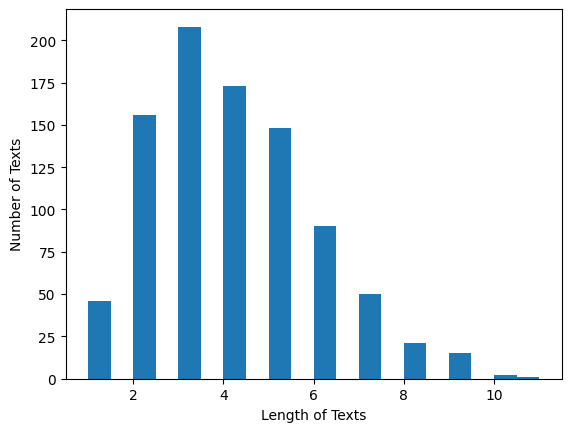

In [16]:
# Hitung panjang setiap input teks
lengths = [len(text.split()) for text in data.inputs]

# Plot distribusi panjang teks
plt.hist(lengths, bins=20)
plt.xlabel('Length of Texts')
plt.ylabel('Number of Texts')
plt.show()

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

vocab_size = 2000
embedding_dim = 16
max_length = 12
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])

x_train = pad_sequences(train, maxlen=max_length, truncating=trunc_type)

# encode label y_train
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
y_train = to_categorical(y_train)

In [18]:
input_shape = x_train.shape[1]
input_shape

12

In [19]:
word_index = tokenizer.word_index
print(len(word_index))
word_index

590


{'<OOV>': 1,
 'saya': 2,
 'apa': 3,
 'aku': 4,
 'merasa': 5,
 'yang': 6,
 'kamu': 7,
 'tidak': 8,
 'bisa': 9,
 'itu': 10,
 'gangguan': 11,
 'bagaimana': 12,
 'nggak': 13,
 'untuk': 14,
 'dengan': 15,
 'cara': 16,
 'depresi': 17,
 'kenapa': 18,
 'ada': 19,
 'kecemasan': 20,
 'cemas': 21,
 'selalu': 22,
 'bipolar': 23,
 'sering': 24,
 'diri': 25,
 'siapa': 26,
 'mengatasi': 27,
 'gak': 28,
 'sedih': 29,
 'mood': 30,
 'stres': 31,
 'gimana': 32,
 'lagi': 33,
 'mengapa': 34,
 'sangat': 35,
 'perasaan': 36,
 'dan': 37,
 'siang': 38,
 'sore': 39,
 'meningkatkan': 40,
 'marah': 41,
 'sih': 42,
 'pagi': 43,
 'malam': 44,
 'mau': 45,
 'sendiri': 46,
 'mental': 47,
 'lakukan': 48,
 'selamat': 49,
 'kerja': 50,
 'dimana': 51,
 'mengalami': 52,
 'harus': 53,
 'teman': 54,
 'sulit': 55,
 'kesehatan': 56,
 'apakah': 57,
 'baik': 58,
 'takut': 59,
 'saja': 60,
 'emosional': 61,
 'perilaku': 62,
 'tahu': 63,
 'seperti': 64,
 'cerita': 65,
 'kelelahan': 66,
 'kesulitan': 67,
 'orang': 68,
 'tidur': 69,

In [20]:
vocabulary = len(tokenizer.word_index)
print("jumlah kata unik: ", vocabulary)
output_length = y_train.shape[1]
print("panjang output: ", output_length)

jumlah kata unik:  590
panjang output:  86


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense

model = Sequential([
    Embedding(input_dim=vocabulary+1, output_dim=12, input_length=input_shape),
    LSTM(12, return_sequences=True),
    Flatten(),
    Dense(output_length, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [23]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0064 - loss: 4.4498
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0244 - loss: 4.3924
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0146 - loss: 4.3098
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0535 - loss: 4.2518
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0392 - loss: 4.2130
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0504 - loss: 4.0746
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0771 - loss: 3.9778
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1062 - loss: 3.7587
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1249 - loss: 3.6460
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1311 - loss: 3.4573
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1403 - loss: 3.3564
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy:

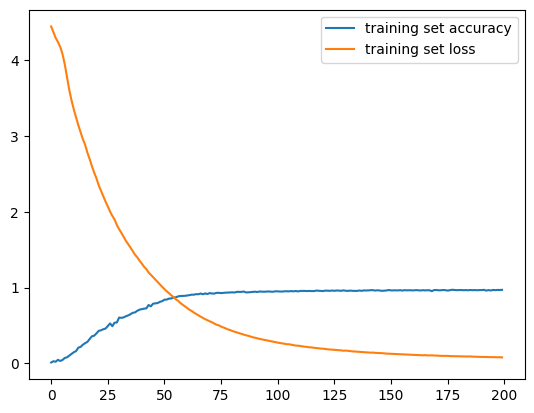

In [24]:
plt.plot(train.history['accuracy'],label="training set accuracy")
plt.plot(train.history['loss'],label="training set loss")
plt.legend()

In [25]:
def chatbot_response(input_text):

    prediction_input = [letters.lower() for letters in input_text if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    prediction_input = tokenizer.texts_to_sequences([prediction_input])
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], maxlen=12)

    output = model.predict(prediction_input)
    output = output.argmax()

    response_tag = le.inverse_transform([output])[0]

    response = random.choice(responses[response_tag])

    return response

In [26]:
import random
chatbot_response("bolehkah saya bertanya?")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


'Tentu. Silakan tanyakan. Saya akan berusaha menjawabnya'

In [27]:
model.save("modelchatbot_moodmate.h5")

In [28]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index

# Save word index to a JSON file
with open('wordindex_chatbotmoodmate.json', 'w') as f:
    json.dump(word_index, f)

In [29]:
!tensorflowjs_converter --input_format keras modelchatbot_moodmate.h5 tfjs_model

2024-06-09 05:04:13.943135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [30]:
import os
os.listdir('tfjs_model')

['group1-shard1of1.bin', 'model.json']